In [12]:
target = 5

In [14]:
from os import listdir
from os.path import abspath, join, isdir, isfile

path = f"./../datasets/SIGGI/targets/{target}"
print("The SIGGI dataset is located in " + abspath(path) + ". Directory content:\n")

content = sorted(listdir(path))
directories = [directory for directory in content if isdir(join(path, directory))]

for directory in directories:
    if not directory.startswith('.'):
        print(directory)
        subcontent = sorted(listdir(join(path, directory)))
        for file in subcontent:
            subdirectory_path = join(path, directory, file)
            if isdir(subdirectory_path):
                num_files = len([f for f in listdir(subdirectory_path) if isfile(join(subdirectory_path, f))])
                print('├──' + file + f"    <-- contains {num_files} files") if not file.startswith('.') else None

The SIGGI dataset is located in /home/jovyan/datasets/SIGGI/targets/5. Directory content:

images
├──train    <-- contains 480 files
├──val    <-- contains 120 files
labels
├──train    <-- contains 480 files
├──val    <-- contains 120 files


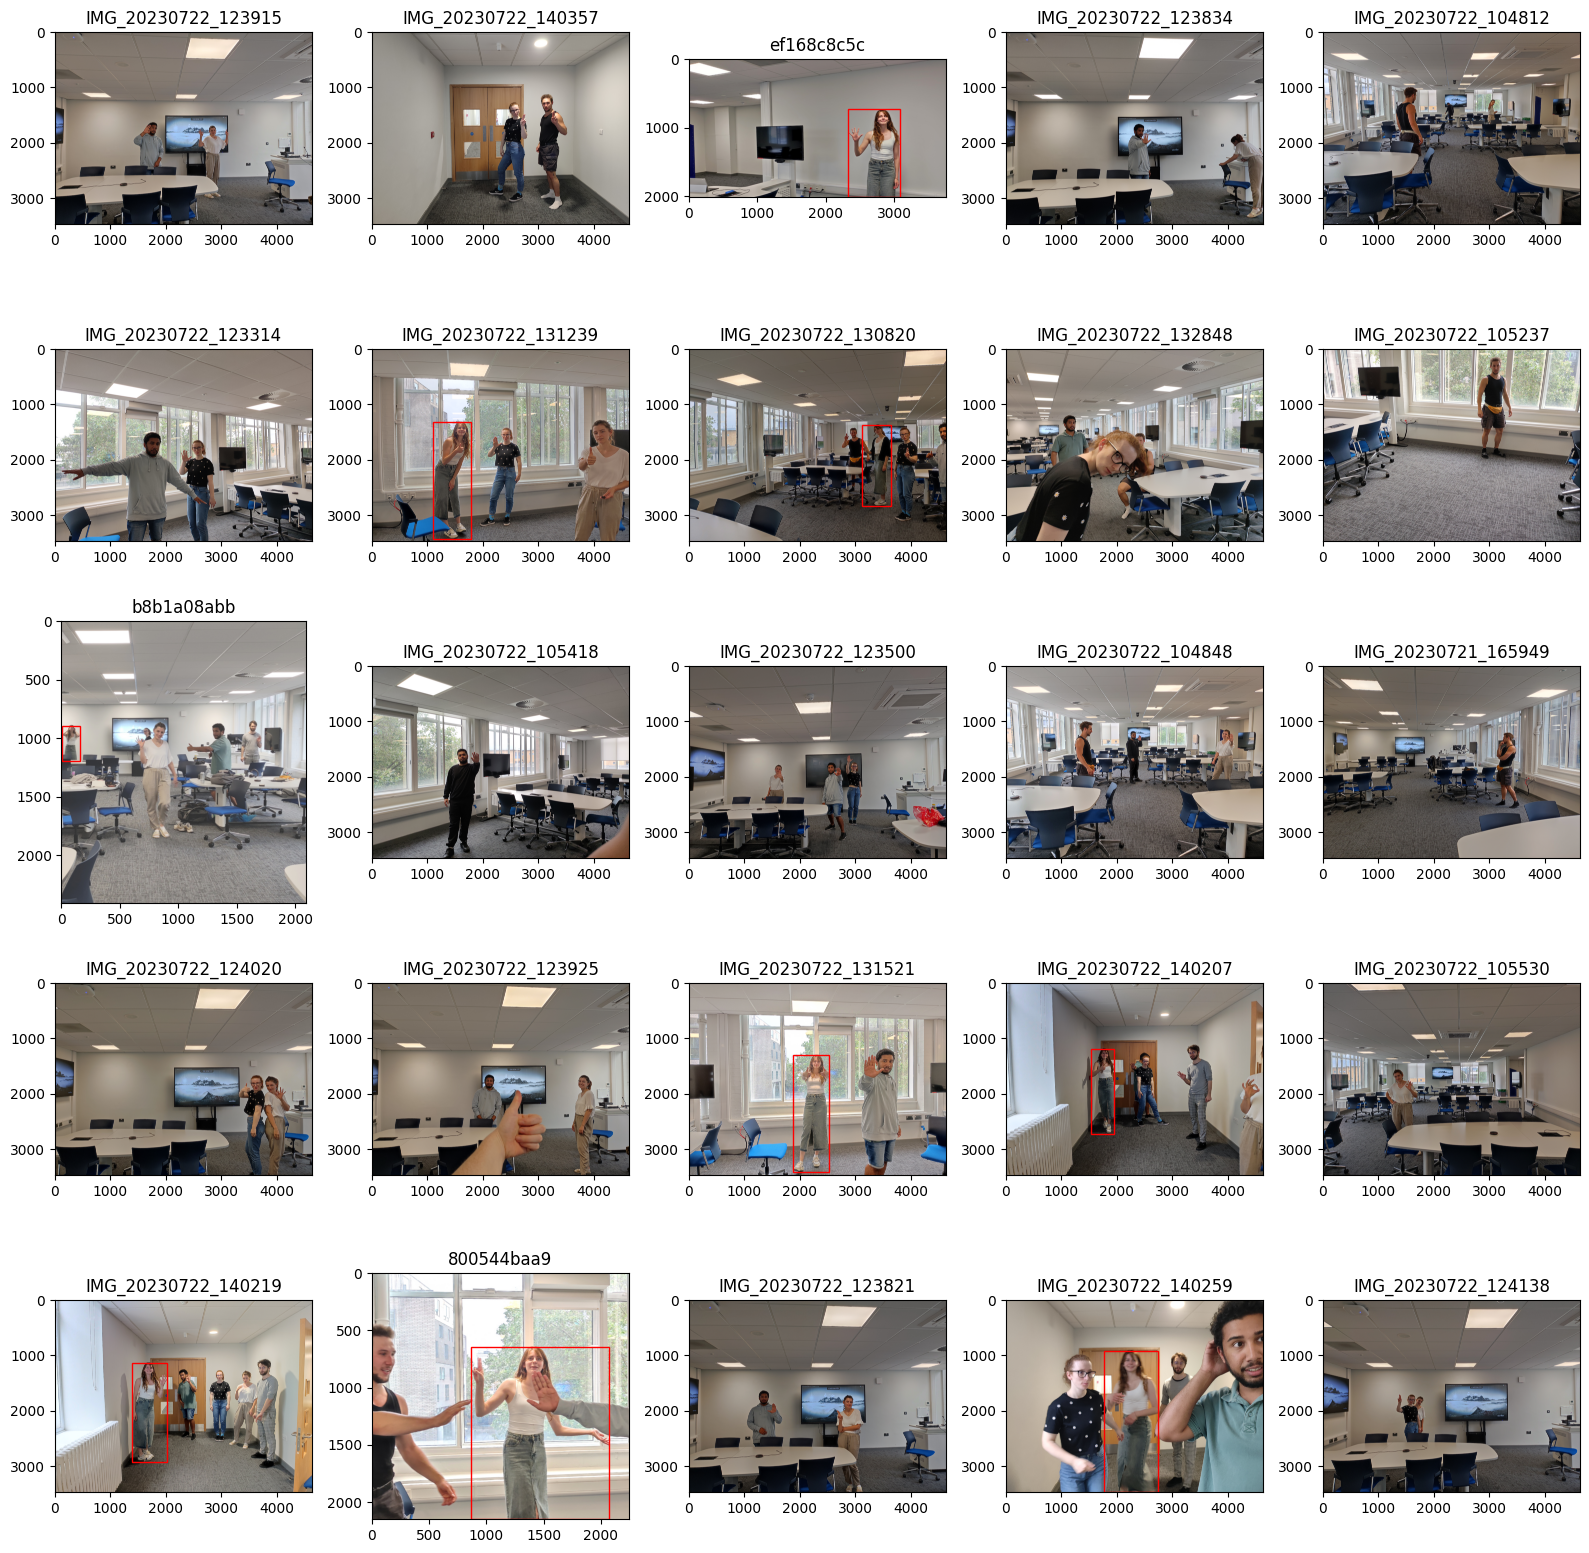

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Set paths to the image and label directories
images_dir = f"./../datasets/SIGGI/targets/{target}/images"
labels_dir = f"./../datasets/SIGGI/targets/{target}/labels"

# Subdirectories for training and validation
train_images_dir = os.path.join(images_dir, "train")
val_images_dir = os.path.join(images_dir, "val")
train_labels_dir = os.path.join(labels_dir, "train")
val_labels_dir = os.path.join(labels_dir, "val")

def get_image_paths_and_labels(images_dir, labels_dir):
    image_paths = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
    label_paths = [os.path.join(labels_dir, f[:-4] + '.txt') for f in os.listdir(images_dir) if f.endswith('.jpg')]
    return image_paths, label_paths

# Get image paths and label paths
train_image_paths, train_label_paths = get_image_paths_and_labels(train_images_dir, train_labels_dir)
val_image_paths, val_label_paths = get_image_paths_and_labels(val_images_dir, val_labels_dir)

# Sample random images
random_train_images = random.sample(train_image_paths, 20)
random_val_images = random.sample(val_image_paths, 5)

# Combine the samples
random_images = random_train_images + random_val_images

# Create a plot with 5x5 subplots
fig, axs = plt.subplots(5, 5, figsize=(16, 16))

# Plot each image with bounding boxes
for i, ax in enumerate(axs.flatten()):
    img_path = random_images[i]
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(
        train_labels_dir if 'train' in img_path else val_labels_dir,
        img_id + '.txt'
    )

    # Load the image
    im = plt.imread(img_path)
    ax.imshow(im)

    # Get image dimensions
    img_width = im.shape[1]
    img_height = im.shape[0]

    # Load the bounding boxes
    if os.path.exists(label_path):
        img_boxes = pd.read_csv(label_path, sep=' ', header=None, names=['class', 'x_center', 'y_center', 'width', 'height'])

        # Draw bounding boxes
        for _, row in img_boxes.iterrows():
            class_, x_center, y_center, width, height = row
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            rect = patches.Rectangle(
                (x_min, y_min), width * img_width, height * img_height,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)

    ax.set_title(img_id)

plt.tight_layout()
plt.show()
